In [ ]:
import pandas as pd

# 1. Load the Data
print("Loading data... please wait.")
df = pd.read_csv('fraudTrain.csv')

# --- 2. DESCRIPTIVE STATISTICS ---
print("\n" + "="*40)
print("DESCRIPTIVE ANALYSIS")
print("="*40)

# Mean vs Median (Skewness Check)
mean_val = df['amt'].mean()
median_val = df['amt'].median()
print(f"Mean Amount:   ${mean_val:.2f}")
print(f"Median Amount: ${median_val:.2f}")

# Standard Deviation (Outlier Check)
std_dev = df['amt'].std()
print(f"Std Deviation: {std_dev:.2f}")

# Skewness
skew = df['amt'].skew()
print(f"Skewness:      {skew:.2f}")

if skew > 1:
    print("\n>> CONCLUSION: Data is HIGHLY SKEWED (Right Skewed).")
    print(">> REASON: We have extreme outliers (Fraud transactions).")
    print(">> NEXT STEP: We must perform Log Transformation.")

Loading data... please wait.

DESCRIPTIVE ANALYSIS
Mean Amount:   $71.69
Median Amount: $47.74
Std Deviation: 161.63
Skewness:      29.53

>> CONCLUSION: Data is HIGHLY SKEWED (Right Skewed).
>> REASON: We have extreme outliers (Fraud transactions).
>> NEXT STEP: We must perform Log Transformation.


In [ ]:
# --- 3. ADDITIONAL STATS (Mode & Quantiles) ---
print("\n" + "="*40)
print("EXTENDED DESCRIPTIVE STATS")
print("="*40)

# Mode (Most common transaction amount)
mode_val = df['amt'].mode()[0]
print(f"Mode (Most Frequent): ${mode_val:.2f}")

# Quantiles
q1 = df['amt'].quantile(0.25)
q3 = df['amt'].quantile(0.75)
print(f"25th Percentile (Q1): ${q1:.2f}")
print(f"75th Percentile (Q3): ${q3:.2f}")

# Measure of Dispersion (Range)
data_range = df['amt'].max() - df['amt'].min()
print(f"Range (Max - Min):   ${data_range:.2f}")

# Kurtosis
kurt = df['amt'].kurt()
print(f"Kurtosis:            {kurt:.2f}")

print("\n" + "="*40)


EXTENDED DESCRIPTIVE STATS
Mode (Most Frequent): $3.52
25th Percentile (Q1): $9.64
75th Percentile (Q3): $83.71
Range (Max - Min):   $15033.18
Kurtosis:            1762.37



# Task
Perform a log transformation on the 'amt' column, calculate descriptive statistics (mean, median, standard deviation, skewness, mode, quantiles, range, and kurtosis) for the log-transformed 'amt' column, and then compare these statistics with the original 'amt' column by creating a summary table or plot, and summarize the observed differences and the impact of the transformation.

## Log Transform 'amt'

### Subtask:
Apply a log transformation to the 'amt' column to address the identified skewness and create a new column for the transformed data.


**Reasoning**:
To address the high skewness identified in the 'amt' column, I will apply a log transformation using `np.log1p` and store the result in a new column called 'amt_log_transformed', as specified in the instructions. First, I need to ensure numpy is imported.



In [2]:
import pandas as pd
import numpy as np

# Re-load df to ensure it is defined in the current execution context
print("Reloading data to ensure 'df' is defined...")
df = pd.read_csv('fraudTrain.csv')

df['amt_log_transformed'] = np.log1p(df['amt'])

print("Log transformation applied to 'amt' column. New column 'amt_log_transformed' created.")
print(df[['amt', 'amt_log_transformed']].head())

Reloading data to ensure 'df' is defined...
Log transformation applied to 'amt' column. New column 'amt_log_transformed' created.
      amt  amt_log_transformed
0    4.97             1.786747
1  107.23             4.684259
2  220.11             5.398660
3   45.00             3.828641
4   41.96             3.760269


## Descriptive Statistics on Transformed Data

### Subtask:
Calculate descriptive statistics (mean, median, standard deviation, skewness, mode, quantiles, range, and kurtosis) for the log-transformed 'amt' column.


**Reasoning**:
To calculate and display the descriptive statistics for the 'amt_log_transformed' column, I will write a code block that computes mean, median, standard deviation, skewness, mode, quantiles, range, and kurtosis, then prints them.



In [3]:
print("\n" + "="*40)
print("DESCRIPTIVE ANALYSIS FOR LOG-TRANSFORMED 'amt'")
print("="*40)

# Mean
mean_log_val = df['amt_log_transformed'].mean()
print(f"Mean (Log Transformed):     {mean_log_val:.2f}")

# Median
median_log_val = df['amt_log_transformed'].median()
print(f"Median (Log Transformed):   {median_log_val:.2f}")

# Standard Deviation
std_dev_log = df['amt_log_transformed'].std()
print(f"Std Deviation (Log Transformed): {std_dev_log:.2f}")

# Skewness
skew_log = df['amt_log_transformed'].skew()
print(f"Skewness (Log Transformed): {skew_log:.2f}")

# Mode
mode_log_val = df['amt_log_transformed'].mode()[0]
print(f"Mode (Log Transformed):     {mode_log_val:.2f}")

# Quantiles
q1_log = df['amt_log_transformed'].quantile(0.25)
q3_log = df['amt_log_transformed'].quantile(0.75)
print(f"25th Percentile (Log Transformed): {q1_log:.2f}")
print(f"75th Percentile (Log Transformed): {q3_log:.2f}")

# Measure of Dispersion (Range)
data_range_log = df['amt_log_transformed'].max() - df['amt_log_transformed'].min()
print(f"Range (Log Transformed):   {data_range_log:.2f}")

# Kurtosis
kurt_log = df['amt_log_transformed'].kurt()
print(f"Kurtosis (Log Transformed): {kurt_log:.2f}")

print("\n" + "="*40)


DESCRIPTIVE ANALYSIS FOR LOG-TRANSFORMED 'amt'
Mean (Log Transformed):     3.54
Median (Log Transformed):   3.89
Std Deviation (Log Transformed): 1.30
Skewness (Log Transformed): -0.29
Mode (Log Transformed):     1.20
25th Percentile (Log Transformed): 2.37
75th Percentile (Log Transformed): 4.44
Range (Log Transformed):   8.76
Kurtosis (Log Transformed): -0.52



## Compare Descriptive Statistics

### Subtask:
Create a summary table or plot to visually compare the key descriptive statistics (mean, median, skewness, kurtosis) of the original 'amt' column with the log-transformed 'amt' column. Ensure labels and legends are provided for clarity.


**Reasoning**:
To compare the descriptive statistics, I will collect the relevant statistical values for both the original and log-transformed 'amt' columns into a dictionary, then convert this dictionary into a pandas DataFrame for a clear, side-by-side comparison.



In [5]:
print("\n" + "="*40)
print("COMPARISON OF DESCRIPTIVE STATISTICS")
print("="*40)

# Re-calculate statistics for the original 'amt' column
mean_val = df['amt'].mean()
median_val = df['amt'].median()
skew = df['amt'].skew()
kurt = df['amt'].kurt()

# Create a dictionary to hold the statistics
stats_data = {
    'Statistic': ['Mean', 'Median', 'Skewness', 'Kurtosis'],
    'Original Amt': [mean_val, median_val, skew, kurt],
    'Log Transformed Amt': [mean_log_val, median_log_val, skew_log, kurt_log]
}

# Create a DataFrame from the dictionary
comparison_df = pd.DataFrame(stats_data)

print(comparison_df.to_string(index=False))
print("\n" + "="*40)


COMPARISON OF DESCRIPTIVE STATISTICS
Statistic  Original Amt  Log Transformed Amt
     Mean     71.536326             3.541686
   Median     47.860000             3.888959
 Skewness     29.174568            -0.285967
 Kurtosis   1878.624620            -0.515228



**Reasoning**:
To visually compare the descriptive statistics, I will create a bar plot using the `comparison_df` DataFrame. This will allow for a clear visual representation of the differences between the original and log-transformed 'amt' columns, specifically for mean, median, skewness, and kurtosis.




VISUAL COMPARISON OF DESCRIPTIVE STATISTICS


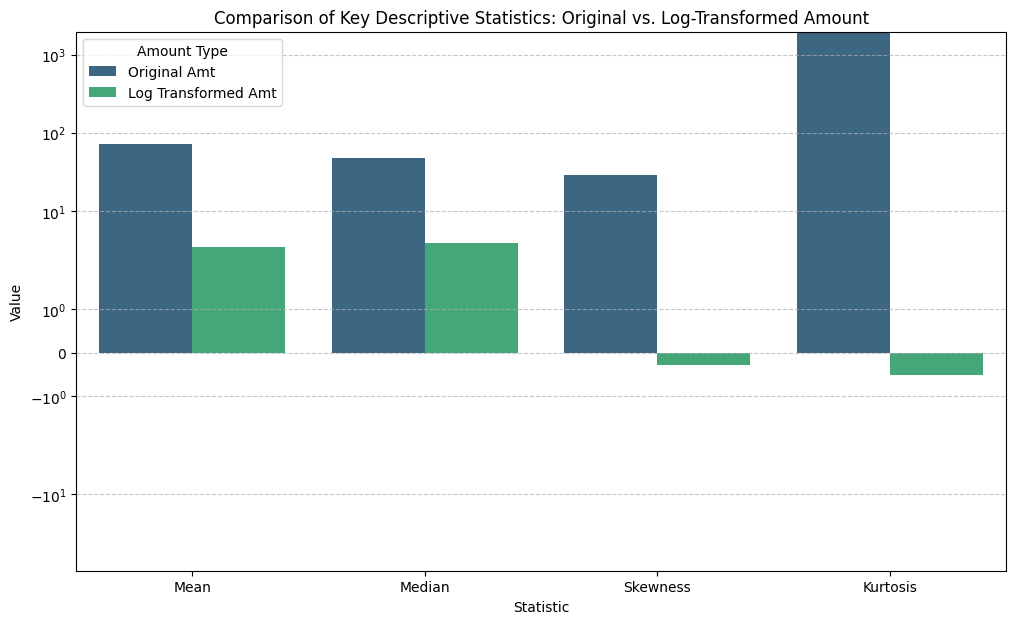

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "="*40)
print("VISUAL COMPARISON OF DESCRIPTIVE STATISTICS")
print("="*40)

# Prepare data for plotting: melt the DataFrame to long format
# Only include 'Original Amt' and 'Log Transformed Amt' for plotting
plot_df = comparison_df.melt(id_vars='Statistic', var_name='Transformation', value_name='Value')

plt.figure(figsize=(12, 7))
sns.barplot(x='Statistic', y='Value', hue='Transformation', data=plot_df, palette='viridis')
plt.title('Comparison of Key Descriptive Statistics: Original vs. Log-Transformed Amount')
plt.xlabel('Statistic')
plt.ylabel('Value')
plt.yscale('symlog') # Use symlog scale due to large differences in Kurtosis values
plt.legend(title='Amount Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\n" + "="*40)